# Creating and visualizing DataFrames

## Visualizing your data

### Histogram

Histograms allow you to see the distribution of a numeric variable throughout its range.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
avocados = pd.read_pickle('./data/avoplotto.pkl')
avocados.head()

,date,type,year,avg_price,size,nb_sold
0,2015-12-27,conventional,2015,0.95,small,9626901.09
1,2015-12-20,conventional,2015,0.98,small,8710021.76
2,2015-12-13,conventional,2015,0.93,small,9855053.66
3,2015-12-06,conventional,2015,0.89,small,9405464.36
4,2015-11-29,conventional,2015,0.99,small,8094803.56


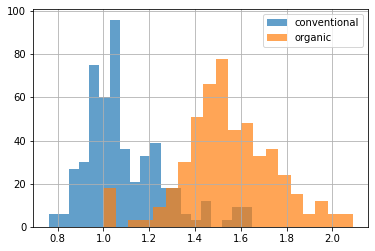

In [11]:
# Subset avocados for the conventional type, and the average price column
# Create a histogram
# Adjust the alpha argument to make the histogram translucid
# Adjuts the number of bins to 20
avocados[avocados.type == 'conventional'].avg_price.hist(bins=20, alpha=0.7)

# Create a histogram of avg_price for organic type avocados
avocados[avocados.type == 'organic'].avg_price.hist(bins=20, alpha=0.7)

# Add a legend to your plot, with the names "conventional" and "organic"
plt.legend(['conventional', 'organic'])

# Show your plot
plt.show()

### Bar plot

Bar plots can help you to reveal relationships between a categorical variable and a numeric variable.

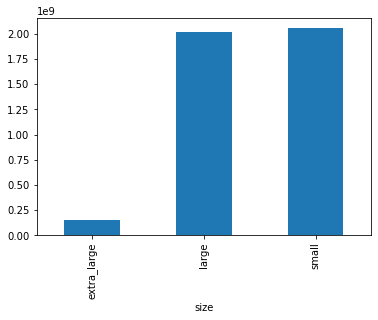

In [5]:
# For each avocado size group, calculate the total number sold, storing as nb_sold_by_size
nb_sold_by_size = avocados.groupby('size').nb_sold.sum()

# Create a bar plot of the number of avocados sold by size
nb_sold_by_size.plot(kind='bar')

# Show the plot
plt.show()

### Line plot

Line plots are designed to visualize the relationship between two numeric variables, where each data values is connected to the next one. They are especially useful for visualizing the change in a number over time since each time point is naturally connected to the next time point. 

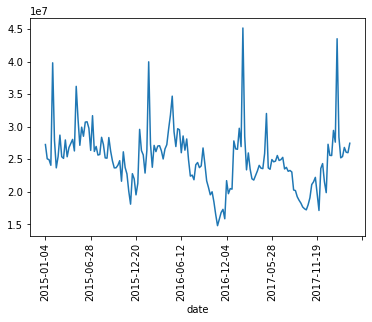

In [9]:
# Get the total number of avocados sold on each date
# The DataFrame has two rows for each date, one for organic and one for conventional 
# Save this as nb_sold_by_date
nb_sold_by_date = avocados.groupby('date').nb_sold.sum()

# Create a line plot of the number of avocados sold
# Rotate the x-ticks labels 90 degrees
nb_sold_by_date.plot(kind='line', rot=90)

# Show the plot
plt.show()

### Scatter plot

Scatter plots are ideal for visualizing relationships between numerical variables.

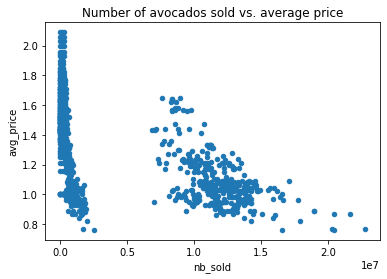

In [10]:
# Create a scatter plot with nb_sold on the x-axis and avg_price on the y-axis
# Title it "Number of avocados sold vs. average price"
avocados.plot(x='nb_sold', y='avg_price', kind='scatter', title='Number of avocados sold vs. average price')

# Show the plot
plt.show()

## Missing values

### Finding missing values

In a pandas DataFrame, missing values are indicated with `NaN`, which stands for "not a number”.

Some functions ignore missing data by default, but that's not always the behavior you might want. Some functions can't handle missing values at all, so these values need to be taken care of before you can use them.

In [50]:
# Print a DataFrame that shows whether each value in avocados_2016 is missing or not
avocados_2016 = pd.read_csv('./data/avocados_2016.csv', index_col=0, parse_dates=['date'])
avocados_2016.isna()

,date,avg_price,total_sold,small_sold,large_sold,xl_sold,total_bags_sold,small_bags_sold,large_bags_sold,xl_bags_sold
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False
5,False,False,False,True,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,True,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False


date               False
avg_price          False
total_sold         False
small_sold          True
large_sold          True
xl_sold             True
total_bags_sold    False
small_bags_sold    False
large_bags_sold    False
xl_bags_sold       False
dtype: bool

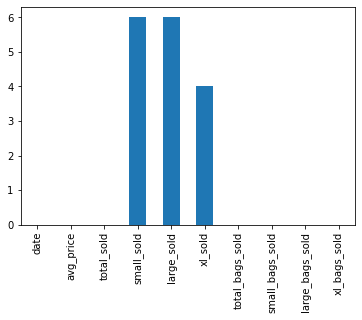

In [51]:
# Print a summary that shows whether any value in each column is missing or not
display(avocados_2016.isna().any())

# Create a bar plot of the total number of missing values in each column
avocados_2016.isna().sum().plot(kind='bar')
plt.show()

### Removing missing values

One way to deal with missing values is to delete the rows that contain them. This can be useful if the proportion of missing data in your dataset is small.

In [53]:
# Remove the rows of avocados_2016 that contain missing values and store the remaining rows in 
avocados_complete = avocados_2016.dropna()

# Verify that all missing values have been removed from avocados_complete
avocados_complete.isna().any()

date               False
avg_price          False
total_sold         False
small_sold         False
large_sold         False
xl_sold            False
total_bags_sold    False
small_bags_sold    False
large_bags_sold    False
xl_bags_sold       False
dtype: bool

### Replacing missing values

Another way of handling missing values is to replace them all with the same value. For numerical variables, one option is to replace values with 0. Be careful! when you replace missing values, you make assumptions about what a missing value means.

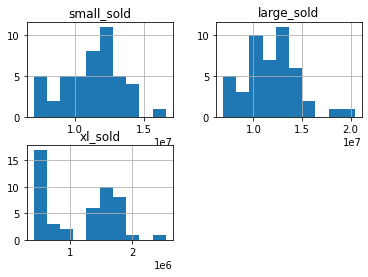

In [58]:
# A list has been created, cols_with_missing, containing the names of columns with missing values: "small_sold", "large_sold", and "xl_sold"
cols_with_missing = ["small_sold", "large_sold", "xl_sold"]

# Create a histogram of those columns
avocados_2016[cols_with_missing].hist()

# Show the plot
plt.show()

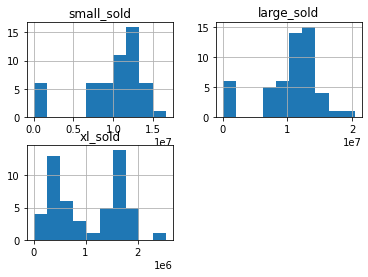

In [59]:
# Replace the missing values of avocados_2016 with 0s and store the result as avocados_filled
avocados_filled = avocados_2016.fillna(0)

# Create a histogram of the cols_with_missing columns of avocados_filled
# Notice the changes in the distributions of the variables respect to avocados_2016
avocados_filled[cols_with_missing].hist()
plt.show()

## Creating DataFrames

### Create a DataFrame from a list of dictionaries

In [60]:
# You have a list of dictionaries with new data called avocados_list
avocados_list = [
    {'date' : "2019-11-03", 'small_sold' : 10376832, 'large_sold' : 7835071},
    {'date': "2019-11-10", 'small_sold' : 10717154, 'large_sold' : 8561348},
]

# Convert the list into a DataFrame called avocados_2019
avocados_2019 = pd.DataFrame(avocados_list)

# Print your new DataFrame
avocados_2019

,date,small_sold,large_sold
0,2019-11-03,10376832,7835071
1,2019-11-10,10717154,8561348


### Create a DataFrame from a dictionary of lists

In [62]:
# Create a dictionary of lists with the new data called avocados_dict
avocados_dict = {
  "date": ["2020-11-17", "2020-12-01"],
  "small_sold": [10859987,	9291631],
  "large_sold": [7674135, 6238096]
}

# Convert the dictionary to a DataFrame called avocados_2020
avocados_2020 = pd.DataFrame(avocados_dict)

# Print your new DataFrame
avocados_2020

,date,small_sold,large_sold
0,2020-11-17,10859987,7674135
1,2020-12-01,9291631,6238096


## Reading and writing DataFrames

### CSV files

CSV, or comma-separated values, is a common data storage file type. It's designed to store tabular data. It's a text file, where each row of data has its own line, and each value is separated by a comma. 

Almost every database, programming language, and piece of data analysis software can read and write CSV files. That makes it a good storage format if you need to share your data.

### CSV to DataFrame

In [64]:
# Read the CSV file "./data/temperatures.csv" and store it as a DataFrame called temperatures
temperatures = pd.read_csv('./data/temperatures.csv', index_col=0)

# Print the first few rows of temperatures
temperatures.head()

,date,city,country,avg_temp_c
0,2000-01-01,Abidjan,Côte D'Ivoire,27.293
1,2000-02-01,Abidjan,Côte D'Ivoire,27.685
2,2000-03-01,Abidjan,Côte D'Ivoire,29.061
3,2000-04-01,Abidjan,Côte D'Ivoire,28.162
4,2000-05-01,Abidjan,Côte D'Ivoire,27.547


### DataFrame to CSV

In [66]:
# Set the country and city columns of temperatures as a multi-level index
mult_ind_temp = temperatures.set_index(['country', 'city']) 

# Save mult_ind_temp as a CSV called temperatures_indexed.csv
mult_ind_temp.to_csv('./data/temperatures_indexed.csv')